In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/cansim-0800020-eng-6674700030567901031.csv', skiprows=6, skipfooter=9, engine='python')

In [5]:
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [7]:
from pandas.tseries.offsets import MonthEnd

In [13]:
df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments')
df.head()

,Unadjusted,Seasonally adjusted
Adjustments,,
1991-02-28,12588862,15026890
1991-03-31,12154321,15304585
1991-04-30,14337072,15413591
1991-05-31,15108570,15293409
1991-06-30,17225734,15676083


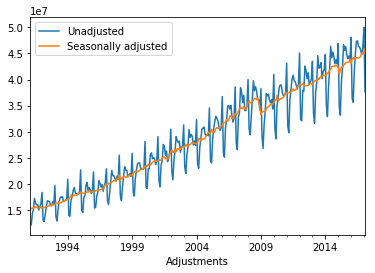

In [14]:
df.plot()

In [15]:
split_date = pd.Timestamp('01-01-2011')

In [16]:
split_date

Timestamp('2011-01-01 00:00:00')

In [18]:
# From beginning upto splitdate
train = df.loc[:split_date, ['Unadjusted']]
# From splitdate to the end
test = df.loc[split_date:, ['Unadjusted']]

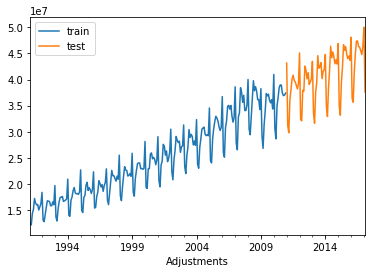

In [21]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [31]:
train_sc[:4]

array([[ 0.01508014],
       [ 0.        ],
       [ 0.07574934],
       [ 0.10252311]])

# Data split

In [40]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

[[ 0.        ]
 [ 0.07574934]
 [ 0.10252311]
 [ 0.17599635]
 [ 0.1453565 ]
 [ 0.13332857]
 [ 0.13571156]
 [ 0.0992869 ]
 [ 0.11981571]
 [ 0.14169641]
 [ 0.21610005]
 [ 0.03229664]
 [ 0.02150413]
 [ 0.07094994]
 [ 0.11813349]
 [ 0.1604027 ]
 [ 0.15831476]
 [ 0.15558192]
 [ 0.12797839]
 [ 0.12694856]
 [ 0.15297168]
 [ 0.13400967]
 [ 0.26126962]
 [ 0.05269417]
 [ 0.02590319]
 [ 0.10610761]
 [ 0.15574721]
 [ 0.18351562]
 [ 0.18357354]
 [ 0.18934308]
 [ 0.15586569]
 [ 0.16088626]
 [ 0.16544718]
 [ 0.17248695]
 [ 0.30448557]
 [ 0.06422726]
 [ 0.05707904]
 [ 0.16348275]
 [ 0.18532659]
 [ 0.22852981]
 [ 0.24879575]
 [ 0.21320209]
 [ 0.20638131]
 [ 0.20846793]
 [ 0.20282714]
 [ 0.22079983]
 [ 0.36557917]
 [ 0.09625654]
 [ 0.08211923]
 [ 0.18403867]
 [ 0.19502688]
 [ 0.26328132]
 [ 0.28335982]
 [ 0.22880015]
 [ 0.24730502]
 [ 0.23273093]
 [ 0.20901399]
 [ 0.23628239]
 [ 0.35239988]
 [ 0.11191099]
 [ 0.11686997]
 [ 0.18945216]
 [ 0.21749045]
 [ 0.29394817]
 [ 0.27572114]
 [ 0.25225927]
 [ 0.26843

# Fully connected predictor

In [33]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

In [34]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [35]:
early_stopping = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [37]:
model.fit(X_train, y_train, epochs=200, batch_size=2, verbose=1, callbacks=[early_stopping])

Epoch 1/200
238/238 [==============================] - 0s 645us/step - loss: 0.2736
Epoch 2/200
238/238 [==============================] - 0s 673us/step - loss: 0.0727
Epoch 3/200
238/238 [==============================] - 0s 638us/step - loss: 0.0421
Epoch 4/200
238/238 [==============================] - 0s 637us/step - loss: 0.0355
Epoch 5/200
238/238 [==============================] - 0s 724us/step - loss: 0.0301
Epoch 6/200
238/238 [==============================] - 0s 741us/step - loss: 0.0258
Epoch 7/200
238/238 [==============================] - 0s 683us/step - loss: 0.0219
Epoch 8/200
238/238 [==============================] - 0s 797us/step - loss: 0.0190
Epoch 9/200
238/238 [==============================] - 0s 785us/step - loss: 0.0164
Epoch 10/200
238/238 [==============================] - 0s 762us/step - loss: 0.0147
Epoch 11/200
238/238 [==============================] - 0s 717us/step - loss: 0.0132
Epoch 12/200
238/238 [==============================] - 0s 766us/step - lo

In [38]:
y_pred = model.predict(X_test)

In [45]:
y_pred[:5]

array([[ 0.99089581],
       [ 0.65911889],
       [ 0.61512506],
       [ 0.80575353],
       [ 0.85660648]], dtype=float32)

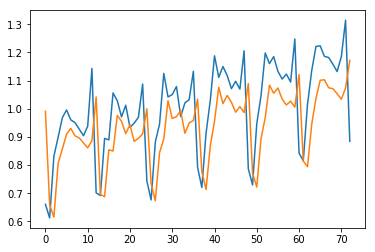

In [46]:
plt.plot(y_test)
plt.plot(y_pred)